Data Exploration

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting data
import seaborn as sns # Advanced visualization

import os


data = pd.read_csv(r'candy-data.csv')
data.head()

In [ ]:
data.tail()

In [ ]:
corr = data.corr()

In [ ]:
corr

In [ ]:
bx = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
bx.set_xticklabels(
    bx.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
data.hist(column='chocolate')
data.hist(column = 'fruity')
data.hist(column = 'peanutyalmondy')
data.hist(column = 'caramel')
data.hist(column = 'nougat')
data.hist(column = 'crispedricewafer')
data.hist(column = 'hard')
data.hist(column = 'bar')
data.hist(column = 'sugarpercent')
data.hist(column = 'pricepercent')
data.hist(column = 'winpercent')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
names = data['competitorname']
data.drop('competitorname', axis=1, inplace=True)

y = data['bar']
x = data.drop(['bar'], axis = 1)
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)



Analyzed Data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

0.8846153846153846
[1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0]


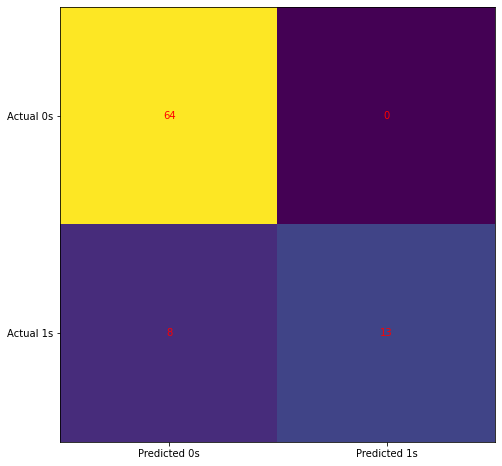

In [9]:
print(model.score(x_test, y_test))

print(model.predict(x))

b = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(b)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, b[i, j], ha='center', va='center', color='red')
plt.show()



In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
model.score(x_test, y_test)

0.7609057841571439

Linear Model of candy attributes vs. win percent

In [14]:
y = data['winpercent']
x = data.drop('winpercent', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.44586753057424544

In [15]:
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

model.fit(x, y)


print('alpha: %f' % model.alpha_)

alpha: 0.990000
